#### <img src="./../res/logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales 

# Tarea Semanal Nº5
#### Alumno: Mauro Fernández

# 1. Consigna

Analizar el fenómeno que se da al calcular la DFT, el efecto de **desparramo espectral**.

Realizar el siguiente experimento:

* Senoidal de frecuencia $f_0 = k_0 * f_S/N = k_0 . \Delta_f$
* **Potencia normalizada**, es decir energía (o varianza) unitaria

### Se pide:

a) Sea $k_0 = \{ N/4, N/4 + 0.25, N/4 + 0.5 \}$ (notar que a cada senoidal se le agrega una pequeña desintonía respecto a  $\Delta_f$) graficar las tres densidades espectrales de potencia (PSD's) y discutir cuál es el efecto de dicha desintonía en el espectro visualizado.

b) Verificar la potencia unitaria de cada PSD. En base a la teoría estudiada, ¿cuál es la razón por la cual una señal senoidal tiene un espectro (PSD) tan diferente respecto a otra de muy pocos Hertz de diferencia?

### Bonus:

* Repetir el experimento mediante la técnica de zero padding. Dicha técnica consiste en agregar ceros al final de la señal para aumentar $\Delta_f$ de forma ficticia. Probar agregando un vector de 9*N ceros al final. Discuta los resultados obtenidos.

# 2. Resolución

En la siguiente sección se implementa el experimento en un loop que genera las 3 senoidales con la desintonía respecto a  $\Delta_f$ y grafica las PSD's. Luego se analizan los resultados obtenidos.

## 2.1. Generación de señales senoidales con desintonía y graficación de PSD

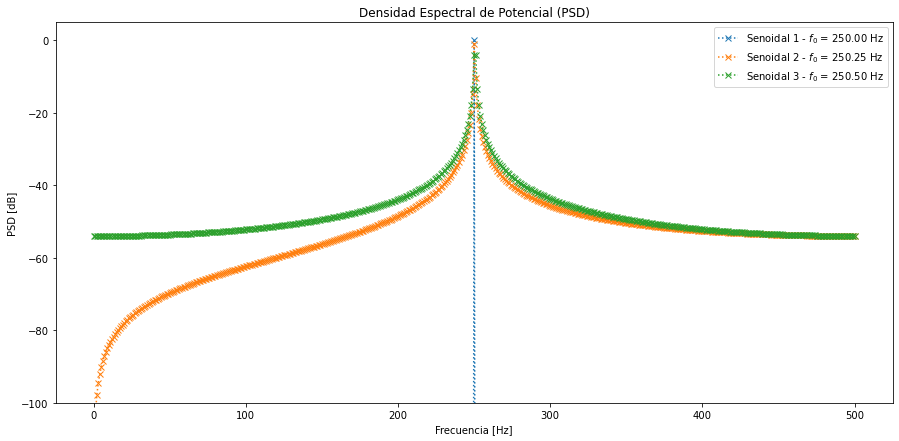

In [48]:
# Importamos módulos a utilizar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Configuración del tamaño de los gráficos
mpl.rcParams['figure.figsize'] = (15,7)

# Definimos parámetros de la señal senoidal
fs = 1000 # Frecuencia de sampling
N  = 1000 # Cantidad de muestras

# Calculamos el paso temporal
ts = 1/fs

# Calculamos la resolución espectral
df = fs/N

# Generamos la grilla temporal
tt = np.linspace(0, (N-1)*ts, N)

# Generamos la grilla frecuencial
ff = np.linspace(0, (N-1)*df, N)

# Generamos un array de las frecuencias fundamentales (mitad de banda) con diferentes desintonías
f0 = np.array([N/4, N/4 + 0.25, N/4 + 0.5]) * df

# Generamos una matriz de las señales senoidales con diferentes desintonías
xx = np.hstack((
    np.sin(2*np.pi*f0[0]*tt).reshape(N,1),
    np.sin(2*np.pi*f0[1]*tt).reshape(N,1),
    np.sin(2*np.pi*f0[2]*tt).reshape(N,1)
))

# Normalizamos en potencia a las señales senoidales
xx = xx / np.sqrt(np.mean(xx**2, axis=0))

# Calculamos la FFT de las señales senoidales
XX = 1/N * np.fft.fft(xx, axis = 0)

# Generamos indexador de los bines acorde rango de frecuencias de interés
bfrec = ff <= fs/2

# Graficamos Densidad Espectral de Potencia de cada señal
plt.figure()
plt.title("Densidad Espectral de Potencial (PSD)")
plt.ylabel("PSD [dB]")
plt.xlabel("Frecuencia [Hz]")
plt.plot(ff[bfrec],10* np.log10(2*np.abs(XX[bfrec,:])**2),':x')
plt.ylim((-100,5))
plt.legend([
    "Senoidal 1 - $f_0$ = {:.2f} Hz".format(f0[0]),
    "Senoidal 2 - $f_0$ = {:.2f} Hz".format(f0[1]),
    "Senoidal 3 - $f_0$ = {:.2f} Hz".format(f0[2])
])
plt.show()

En el dominio del tiempo, nuestra señal $x[n]$ se ve afectada por una ventana implicita $w[n]$ definida como:

$$
w[n] = 
\begin{cases} 
  1, & 0\leq n \leq N \\
  0, & otherwise
\end{cases}
$$

obteniendose en consecuencia la señal $x'[n]$ definida como:

$$x'[n] = x[n]\ .w[n]$$

En el dominio de la frecuencia, esto se traduce como la convolución de la transformada de ambas señales:

$$X'(k) = \frac{1}{2\pi} X(k) \ * W(k)$$

Se conoce a W(k) como *kernel de Dirichlet*, el cual tiene forma de sinc y está montado sobre nuestra señal de análisis. 

Cuando la frecuencia fundamental de nuestra señal de análisis es múltiplo entero de la resolución espectral, los cruces por cero del kernel coinciden exactamente con cada frecuencia múltiplo de $df$, por ello es que no vemos su presencia. La potencia queda concentrada en un único bin donde la amplitud del kernel es máxima (lóbulo principal) que es donde se encuentra la frecuencia fundamental de nuestra señal de prueba.

<img src="./sintonizada.png" align="center" width="433" /> 
<center>Figura 1 - Espectro de señal sintonizada</center> 

Cuando la señal tiene una desintonía, los cruces por cero del kernel no ocurren exactamente en las frecuencias múltiplo de $df$. En consecuencia, se observa como si la potencia de nuestra señal se hubiese desparramado en frecuencia en varios armónicos (que no son más que amplitudes no nulas del kernel). 

A este efecto se lo conoce como **desparramo espectral** o *spectral leakage* en inglés.

<img src="./desintonizada.png" align="center" width="433" /> 
<center>Figura 2 - Espectro de señal con desintonía</center> 

Es importante entender que el valor de la potencia no cambió, sigue siendo unitaria para todas las señales de prueba. Lo que cambió fue su distribución en las frecuencias.


## 2.2. Verificación de la potencia unitaria de cada PSD

In [49]:
# Calculo de la potencia de cada señal en el dominio del tiempo
np.mean(xx**2, axis=0)

array([1., 1., 1.])

In [50]:
# Cálculo de la potencia de cada señal en el dominio de la frecuencia
np.sum(np.abs(XX)**2,axis=0)

array([1., 1., 1.])

La razón por la que cada señal tiene un espectro tan diferente en frecuencia a pesar de que todas son señales senoidales puras y con una mínima desintonía es debido al efecto de desparramo espectral causado por la presencia del kernel de Dirichlet a partir de la ventana implícita que afecta a las señales.

# 3. BONUS
## 3.1. Repetición del experimento implementando la técnica de zero padding

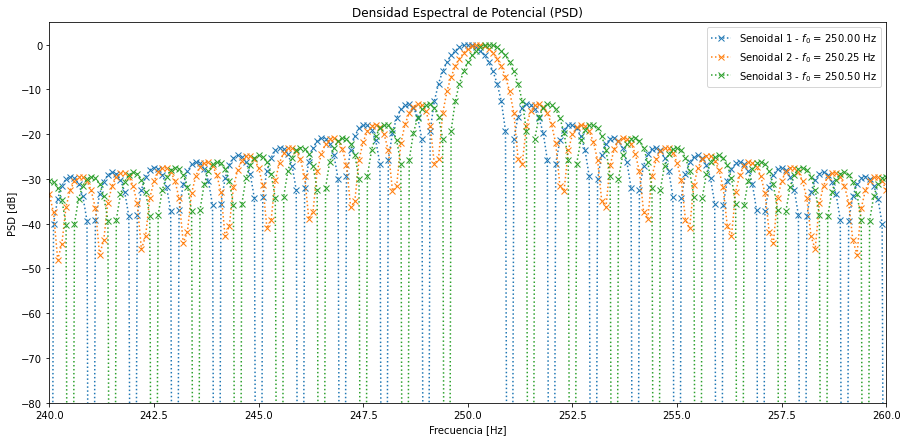

In [51]:
# Definimos el factor de padding
cant_pad = 9

# Generamos matriz de ceros con dimensión igual xx
zz = np.zeros_like(xx)

# Hacemos un append de los ceros al final de cada señal
xx_pad = np.vstack([xx, zz.repeat(cant_pad, axis = 0)])

# Obtenemos la cantidad de muestras de la señales con padding
N_Pad = xx_pad.shape[0]

# Calculamos resolución espectral para señales con padding
df = fs/N_Pad

# Generamos grilla frecuencial para señales con padding
ff = np.linspace(0, (N_Pad-1)*df, N_Pad)

# Normalizamos señal con padding a 0 dB
xx_pad = xx_pad * N_Pad / N
    
# Calculamos la FFT de las señales con padding
XX_pad = 1/N_Pad * np.fft.fft(xx_pad, axis = 0)

# Generamos indexador de los bines acorde rango de frecuencias de interés
bfrec = ff <= fs/2

# Graficamos Densidad Espectral de Potencia de cada señal
plt.figure()
plt.title("Densidad Espectral de Potencial (PSD)")
plt.ylabel("PSD [dB]")
plt.xlabel("Frecuencia [Hz]")
plt.plot(ff[bfrec],10* np.log10(2*np.abs(XX_pad[bfrec,:])**2),':x')
plt.xlim((240,260))
plt.ylim((-80,5))
plt.legend([
    "Senoidal 1 - $f_0$ = {:.2f} Hz".format(f0[0]),
    "Senoidal 2 - $f_0$ = {:.2f} Hz".format(f0[1]),
    "Senoidal 3 - $f_0$ = {:.2f} Hz".format(f0[2])
])
plt.show()

Puede verse en el espectro los lóbulos del kernel de Dirichlet y como el lóbulo principal está centrado en la frecuencia fundamental para cada señal de prueba.

Con la técnica de *zero padding* logramos en frecuencia un interpolante sinc para dar valor entre muestra y muestra.

# 4. Conclusiones

En resumen con los experimentos realizados comprobamos que:
* Se produce el efecto de *desaparramo espectral* en la señales con desintonía, producto de la presencia de una ventana implicita que afecta a nuestra señal de prueba, dando como resultado la presencia del kernel de Dirichlet en frecuencia que se monta sobre nuestra señal.
* La potencia de la señal se mantiene aún cuando se produce el efecto de desparramo, lo que cambia es su distribución en los bines.
* Con la técnica de zero padding logramos la visualización del kernel de Dirichlet y un interpolador sinc entre muestra y muestra. Dado que este método de interpolación es rápido dado que está basado en la FFT (algoritmo muy optimizado) puede ser util para aplicaciones donde se requiere realizar muy rápidamente la interpolación, como por ejemplo al procesar una imagen.
